### NOTE: If running from colab and you have uploaded the folder ERA-V1/era_v1_session7_pankaja then uncomment the two cells below and run before moving on to Install libraries

In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# %cd /gdrive/My\ Drive/ERA-V1/era_v1_session7_pankaja

/gdrive/My Drive/ERA-V1/era_v1_session7_pankaja


### Install libraries

In [3]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Libraries

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from tqdm import tqdm
from torchsummary import summary

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt

from model import Model_1, download_model_data, create_data_loader, train_and_predict
from utils import get_device, plot_metrics

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

### Target:
- create a model structure set up

### Results:
- Total parameters are of the order of ~6 Million
- Train accuracy of  and test accuracy of

### Analysis:
- This base model Model_1 is just so we establish a structure set up and not be concerned<br />
with the train and test results.


## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)


## Load and Prepare Dataset

MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels

We load the PIL images using torchvision.datasets.MNIST, while loading the image we transform he data to tensor and normalize the images with mean and std deviation of MNIST images.

Data tasks:
- transformers
- data download
- train and test split

In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# apply data tranformation and download the train and test data
ds_train, ds_test = download_model_data()
# dataloader arguments - something you'll fetch these from cmdprmt
kw_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(ds_train, **kw_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(ds_test, **kw_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


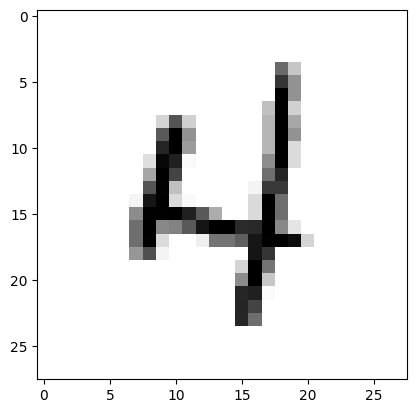

In [6]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = ds_train.train_data
train_data = ds_train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', ds_train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', ds_train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

# create an iter
images, labels = next(iter(train_loader))

print(images.shape)
print(labels.shape)

# visualize
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

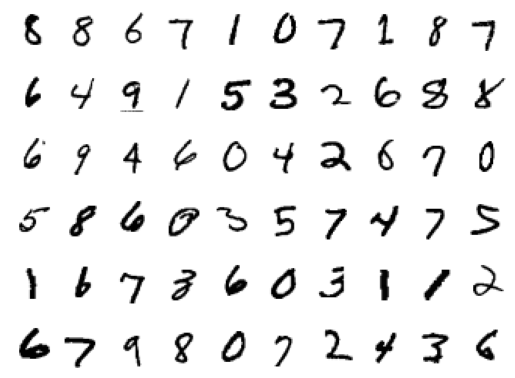

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Model_1 summary

In [8]:
# get device and load Model_1
device = get_device()
print(device)
model = Model_1().to(device)
summary(model, input_size=(1, 28, 28))

CUDA Available? True
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-----------

### Training and Testing

We have 6.3M params, and that's way too many. Purpose of this model is to set up the structure.

**Train and test -  Model_1**

In [9]:
# initialize train, test losses and accuracy related variables
train_losses = []
test_losses = []
train_acc = []
test_acc = []

# load model to device and start the training
model = Model_1().to(device)
epochs = 20
lr = 0.01
train_losses1, train_acc1, test_losses1, test_acc1 = train_and_predict(model, device,
                                                                   train_loader=train_loader,
                                                                   test_loader=test_loader,
                                                                   num_epochs=epochs, lr=lr)


Epoch 1


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Train: Loss=0.0569 Batch_id=468 Accuracy=88.03: 100%|██████████| 469/469 [00:23<00:00, 20.28it/s]


Test set: Average loss: 0.0635, Accuracy: 9797/10000 (97.97%)

Epoch 2


Train: Loss=0.0215 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:22<00:00, 20.61it/s]


Test set: Average loss: 0.0358, Accuracy: 9872/10000 (98.72%)

Epoch 3


Train: Loss=0.0538 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:25<00:00, 18.38it/s]


Test set: Average loss: 0.0332, Accuracy: 9884/10000 (98.84%)

Epoch 4


Train: Loss=0.0058 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:24<00:00, 19.45it/s]


Test set: Average loss: 0.0288, Accuracy: 9902/10000 (99.02%)

Epoch 5


Train: Loss=0.0085 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:22<00:00, 20.60it/s]


Test set: Average loss: 0.0278, Accuracy: 9907/10000 (99.07%)

Epoch 6


Train: Loss=0.0074 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:25<00:00, 18.74it/s]


Test set: Average loss: 0.0294, Accuracy: 9901/10000 (99.01%)

Epoch 7


Train: Loss=0.0523 Batch_id=468 Accuracy=99.72: 100%|██████████| 469/469 [00:24<00:00, 19.47it/s]


Test set: Average loss: 0.0271, Accuracy: 9911/10000 (99.11%)

Epoch 8


Train: Loss=0.0135 Batch_id=468 Accuracy=99.69: 100%|██████████| 469/469 [00:24<00:00, 19.20it/s]


Test set: Average loss: 0.0280, Accuracy: 9922/10000 (99.22%)

Epoch 9


Train: Loss=0.0009 Batch_id=468 Accuracy=99.77: 100%|██████████| 469/469 [00:22<00:00, 20.67it/s]


Test set: Average loss: 0.0278, Accuracy: 9921/10000 (99.21%)

Epoch 10


Train: Loss=0.0013 Batch_id=468 Accuracy=99.87: 100%|██████████| 469/469 [00:23<00:00, 20.27it/s]


Test set: Average loss: 0.0260, Accuracy: 9933/10000 (99.33%)

Epoch 11


Train: Loss=0.0036 Batch_id=468 Accuracy=99.87: 100%|██████████| 469/469 [00:24<00:00, 19.09it/s]


Test set: Average loss: 0.0284, Accuracy: 9928/10000 (99.28%)

Epoch 12


Train: Loss=0.0002 Batch_id=468 Accuracy=99.87: 100%|██████████| 469/469 [00:24<00:00, 19.50it/s]


Test set: Average loss: 0.0285, Accuracy: 9927/10000 (99.27%)

Epoch 13


Train: Loss=0.0000 Batch_id=468 Accuracy=99.89: 100%|██████████| 469/469 [00:23<00:00, 19.83it/s]


Test set: Average loss: 0.0278, Accuracy: 9926/10000 (99.26%)

Epoch 14


Train: Loss=0.0010 Batch_id=468 Accuracy=99.92: 100%|██████████| 469/469 [00:23<00:00, 20.39it/s]


Test set: Average loss: 0.0352, Accuracy: 9914/10000 (99.14%)

Epoch 15


Train: Loss=0.0000 Batch_id=468 Accuracy=99.93: 100%|██████████| 469/469 [00:23<00:00, 19.63it/s]


Test set: Average loss: 0.0322, Accuracy: 9927/10000 (99.27%)

Epoch 16


Train: Loss=0.0004 Batch_id=468 Accuracy=99.92: 100%|██████████| 469/469 [00:23<00:00, 19.85it/s]


Test set: Average loss: 0.0321, Accuracy: 9920/10000 (99.20%)

Epoch 17


Train: Loss=0.0001 Batch_id=468 Accuracy=99.92: 100%|██████████| 469/469 [00:22<00:00, 20.63it/s]


Test set: Average loss: 0.0320, Accuracy: 9924/10000 (99.24%)

Epoch 18


Train: Loss=0.0002 Batch_id=468 Accuracy=99.98: 100%|██████████| 469/469 [00:23<00:00, 20.08it/s]


Test set: Average loss: 0.0323, Accuracy: 9932/10000 (99.32%)

Epoch 19


Train: Loss=0.0004 Batch_id=468 Accuracy=99.92: 100%|██████████| 469/469 [00:25<00:00, 18.05it/s]


Test set: Average loss: 0.0339, Accuracy: 9933/10000 (99.33%)

Epoch 20


Train: Loss=0.0000 Batch_id=468 Accuracy=99.95: 100%|██████████| 469/469 [00:23<00:00, 20.36it/s]


Test set: Average loss: 0.0317, Accuracy: 9932/10000 (99.32%)



In [10]:
train_losses

[]

**Plot the train and test losses and accuracies for Model_1**

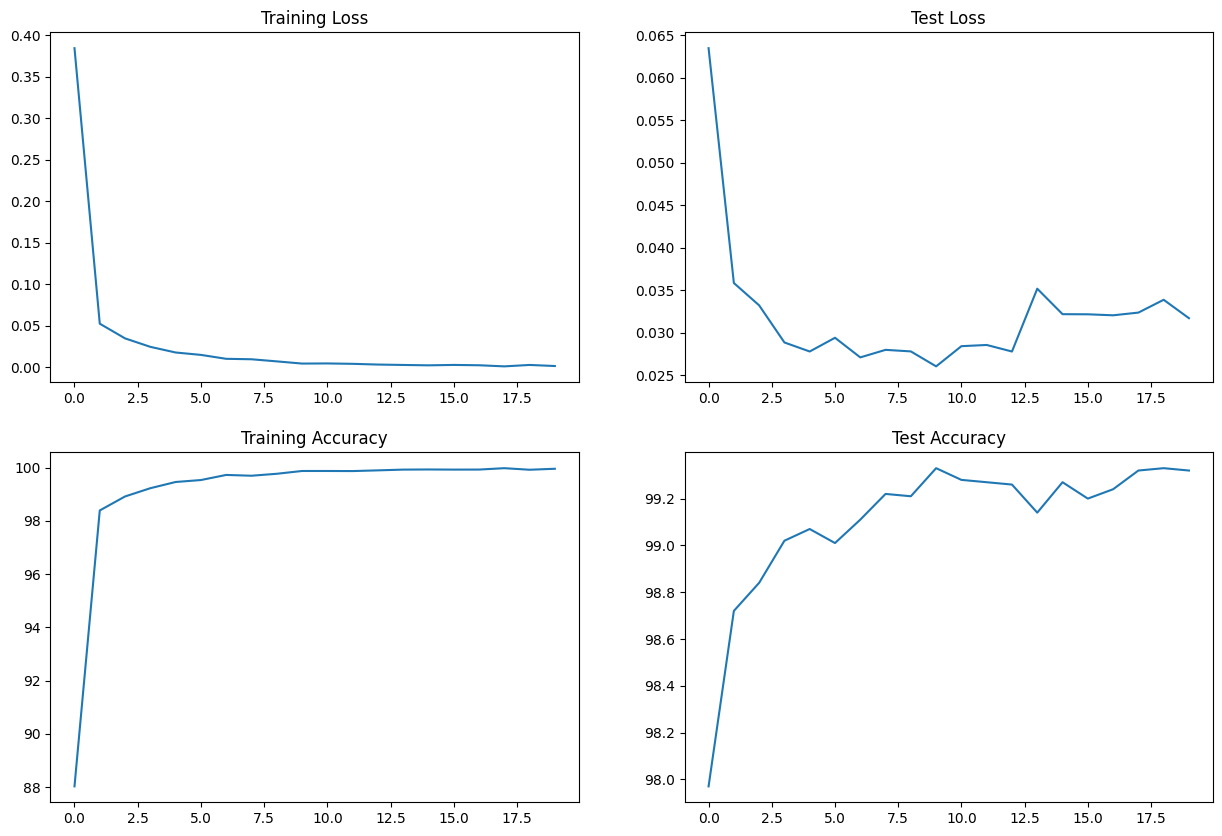

In [11]:
plot_metrics(train_losses1, train_acc1, test_losses1, test_acc1)